In [4]:
import os
import sys

AeroBDSM_OOP_dir = os.path.abspath(os.path.join('../AERO_LIB/'))
if AeroBDSM_OOP_dir not in sys.path:
    sys.path.append(AeroBDSM_OOP_dir)

PyXfoil_dir = os.path.abspath(os.path.join('../mpyXfoil/'))
if PyXfoil_dir not in sys.path:
    sys.path.append(PyXfoil_dir)

import pyXfoil as pxf
from isolated_plane import *
from libs.Atmosphere import atmo
from math import *
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame, read_excel
%config InlineBackend.figure_format = 'svg'

# Задание формата шрифта для графиков
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.weight'] = 'ultralight'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams['font.style'] = 'normal'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['mathtext.fontset'] = 'stix'

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Геометрические параметры несущей поверхности

# Параметры крыла
l_kr = 2.5            # размах крыла [м]
l_c = 2.5/2             # длина одной консоли [м]
b_b = 0.5             # бортовая хорда [м]
b_1 = 0.5             # концевая хорда [м]
chi_0 = radians(0)  # угол стреловидности по передней кромке [рад]
chi_1 = radians(0)      # угол стреловидности по задней кромке [рад]

# Параметры профиля крыла
cc_b = 0.12            # относительная толщина профиля бортовой хорды [-]
cc_1 = 0.12            # относительная толщина профиля концевой хорды [-]
cc = (cc_b + cc_1) / 2  # средняя относительная толщина профиля [-]
xx_c = 0.3              # относительная координата положения максимальной толщины [-]
hb = 1e-3               # относительная высота бугорков профиля [-]
rr_0 = 1                # относительный радиус скругления передней кромки [-]
aa = 0.5                # отношение геометрического параметра профиля `a` в долях рассматриваемой хорды [-]

xx_0 = 0                # относительная координата центра вращения в долях САХ (от носка САХ) относительно которой считаются моменты
xx_t = None             # относительная координата перехода пограничного слоя из ламинарного в турбулентный в долях рассматриваемой хорды
T_s = None              # средняя температура поверхности крыла, К

# Расчет геометрических параметров

S_kr = (b_b + b_1) / 2 * l_kr
lambda_kr = l_kr ** 2 / S_kr
zeta_kr = b_1 / b_b
chi_05 = atan(tan(chi_0) - 2 / lambda_kr * (1 / zeta_kr - 1) / (1 / zeta_kr + 1))

In [6]:
Airfoil = SubsonicProfile(b_b, cc, xx_c, rr_0, hb, 'naca')      # Создание экземпляра класса дозвукового профиля
IP = IsolatedPlane(S_kr, lambda_kr, zeta_kr, chi_05, Airfoil)   # Создание экземпляра класса изолированного крыла

In [7]:
# Результаты расчета в Ansys

alpha_Ansys = np.array([0, 2, 4, 8, 12, 16])

cxa_Ansys = np.array([0.01024871, 0.01169752, 0.01607037, 0.03400446, 0.06367909, 0.16330742])
cya_Ansys = np.array([1.06787254e-04, 1.37893522e-01, 2.76604566e-01, 5.51021198e-01, 7.88472609e-01, 6.76273519e-01])
mza_Ansys = np.array([3.37402638e-05, 1.52577015e-02, 3.08446023e-02, 6.22609739e-02, 8.85198277e-02, 1.05769155e-01])
# Параметры невозмущенного потока
H_Ansys = 0                         # Высота полета
rho_Ansys = atmo.rho(H_Ansys)       # Плотность воздуха
a_Ansys = atmo.a(H_Ansys)           # Скорость звука
nu_Ansys = 15.06e-6                 # Кинематическая вязкость воздуха

# M = 0.2                             # Число Маха
V = 68                    # Скорость потока
M = V / a_Ansys
q = rho_Ansys * V ** 2 / 2          # Скоростной напор

Re_Ansys = V * b_b / nu_Ansys       # Число Рейнольдса для крыла

In [8]:
Airfoil = SubsonicProfile(b_b, cc, xx_c, rr_0, hb, 'naca')      # Создание экземпляра класса дозвукового профиля
IP = IsolatedPlane(S_kr, lambda_kr, zeta_kr, chi_05, Airfoil)   # Создание экземпляра класса изолированного крыла

In [21]:
# Расчет крыла по Лебедеву-Чернобровкину

cya_LiCH, cxa_LiCH, mza_LiCH = [], [], []
cxa_w_LiCH = []
cxa0_LicH = []
cxa_i_LiCH = []

alphas = np.linspace(0, 20, 31)

for alf in alphas:
    cxa_LiCH.append(IP.c_xa(M, np.deg2rad(alf)))
    cya_LiCH.append(IP.c_ya(M, np.deg2rad(alf)))
    cxa_w_LiCH.append(IP.c_xa_w(M, np.deg2rad(alf)))
    cxa0_LicH.append(IP.c_xa0(M, np.deg2rad(alf)))
    cxa_i_LiCH.append(IP.c_xai(M, np.deg2rad(alf)))
    

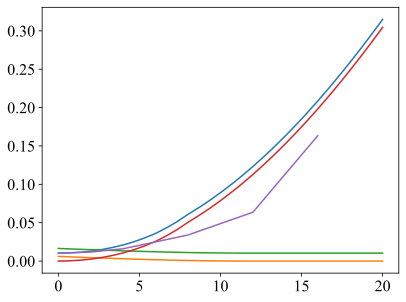

In [22]:
plt.plot(alphas, cxa_LiCH)
plt.plot(alphas, cxa_w_LiCH)
plt.plot(alphas, cxa0_LicH)
plt.plot(alphas, cxa_i_LiCH)
plt.plot(alpha_Ansys, cxa_Ansys)

In [18]:
IP.c_xa_w(M, np.deg2rad(alf))

0